<a href="https://colab.research.google.com/github/SbElolen/SalesDataAnalysis/blob/main/sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

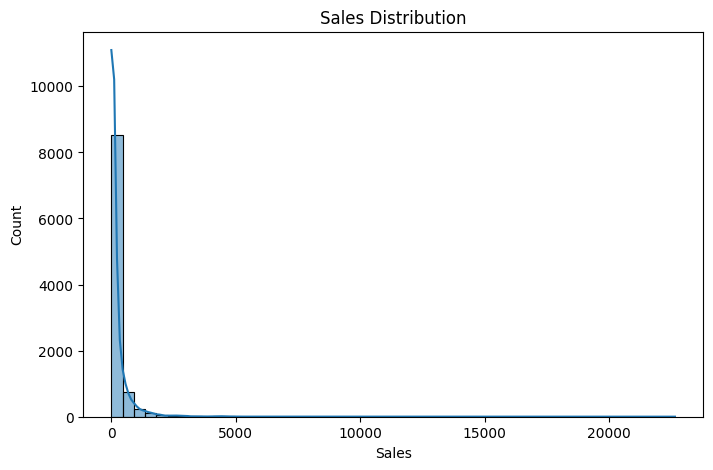

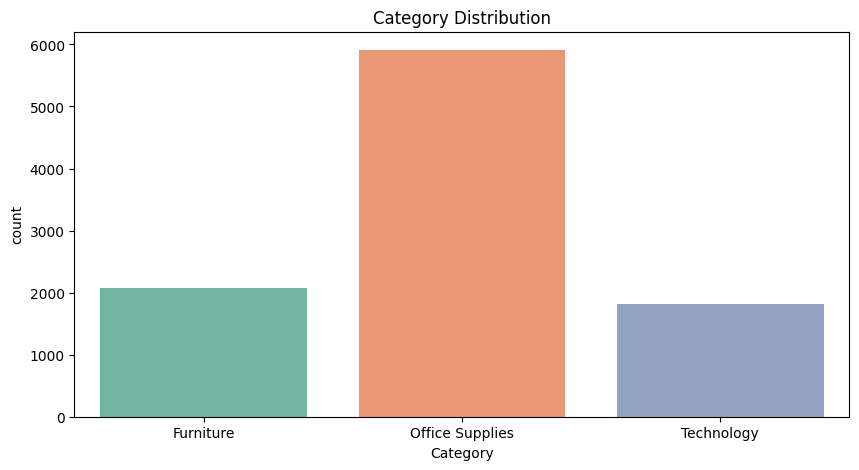

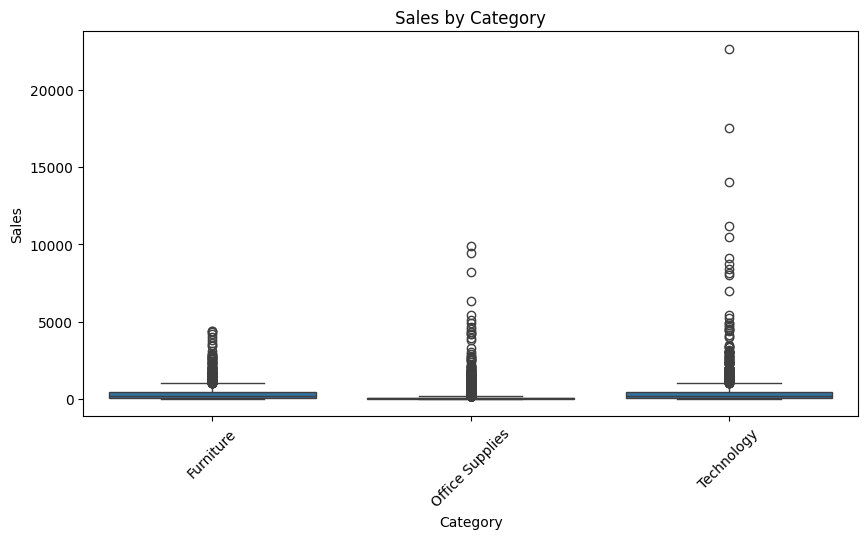

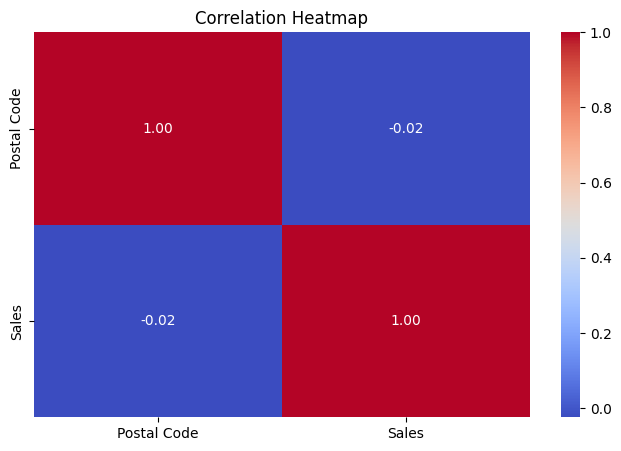

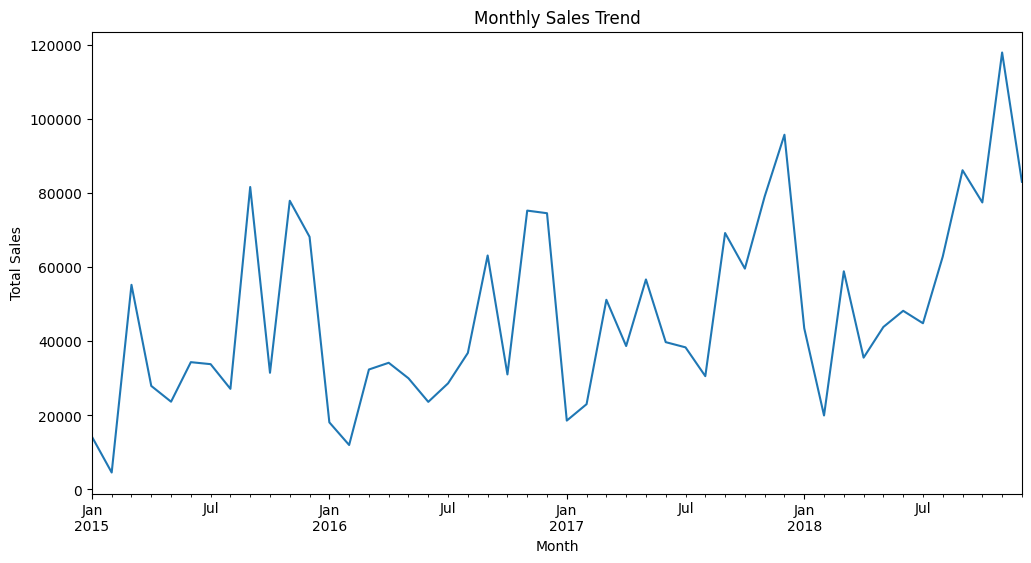

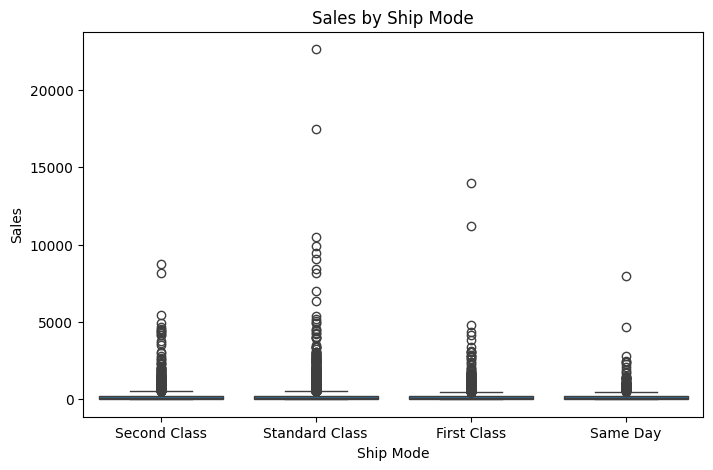

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv("train.csv")

# Displaying basic information
print(df.info())
print(df.describe())

# To check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

df.drop(columns=['Row ID'], inplace=True, errors='ignore')

# Converting date columns to datetime format cus it gave me an error
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# To check for duplicate values
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Uni-variate Analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()

# Categorical variable distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df, palette='Set2', hue='Category', legend=False)
plt.title("Category Distribution")
plt.show()

# Bi-variate Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 5))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Time-series Analysis
sales_trend = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
sales_trend.plot(kind='line', figsize=(12, 6), title="Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# Ship Mode vs Sales
plt.figure(figsize=(8, 5))
sns.boxplot(x='Ship Mode', y='Sales', data=df)
plt.title("Sales by Ship Mode")
plt.show()